# Chapter 22: Revisitng characterization

For additional context see chapter 22 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [10]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from process_improvement import xmr_charts as xmr

%matplotlib inline

## Get Dublin Maternity Hospital data

In [19]:
# Dataset URL
dublin_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/09-vienna-general-dublin-maternity-death-to-birth-ratios-data.csv'

# Get data function
def get_data(dataset_url) -> pd.DataFrame():
    return pd.read_csv(dataset_url)

# Get data
hospital_df = get_data(dublin_url)

# Drop 'Note' column
hospital_df = hospital_df.drop(columns='Note')

# Specify 'Year' as dtype string
hospital_df['Year'] = hospital_df['Year'].astype('string')
hospital_df.dtypes

Hospital                 object
Year                     string
Births                    int64
Deaths                    int64
Death-to-Birth Ratio    float64
dtype: object

## Split dataframe according to 'Hospital'

In [20]:
# Get clinic groups
grouped_df = hospital_df.groupby('Hospital')

# Create first and second clinic dataframes
vienna = grouped_df.get_group('Vienna General Hospital')
dublin = grouped_df.get_group('Dublin Maternity Hospital').reset_index(drop=True)

In [21]:
# Calculate moving range for Dublin
dublin['Moving Ranges'] = abs(dublin['Death-to-Birth Ratio'].diff())
dublin

,Hospital,Year,Births,Deaths,Death-to-Birth Ratio,Moving Ranges
0,Dublin Maternity Hospital,1784,1261,11,0.9,NaN
1,Dublin Maternity Hospital,1785,1292,8,0.6,0.3
2,Dublin Maternity Hospital,1786,1351,8,0.6,0.0
3,Dublin Maternity Hospital,1787,1347,10,0.7,0.1
4,Dublin Maternity Hospital,1788,1469,23,1.6,0.9
...,...,...,...,...,...,...
61,Dublin Maternity Hospital,1845,1411,35,2.5,1.9
62,Dublin Maternity Hospital,1846,2025,17,0.8,1.7
63,Dublin Maternity Hospital,1847,1703,47,2.8,2.0
64,Dublin Maternity Hospital,1848,1816,35,1.9,0.9


## Fig 22.3: XmR Chart of Dublin ratios

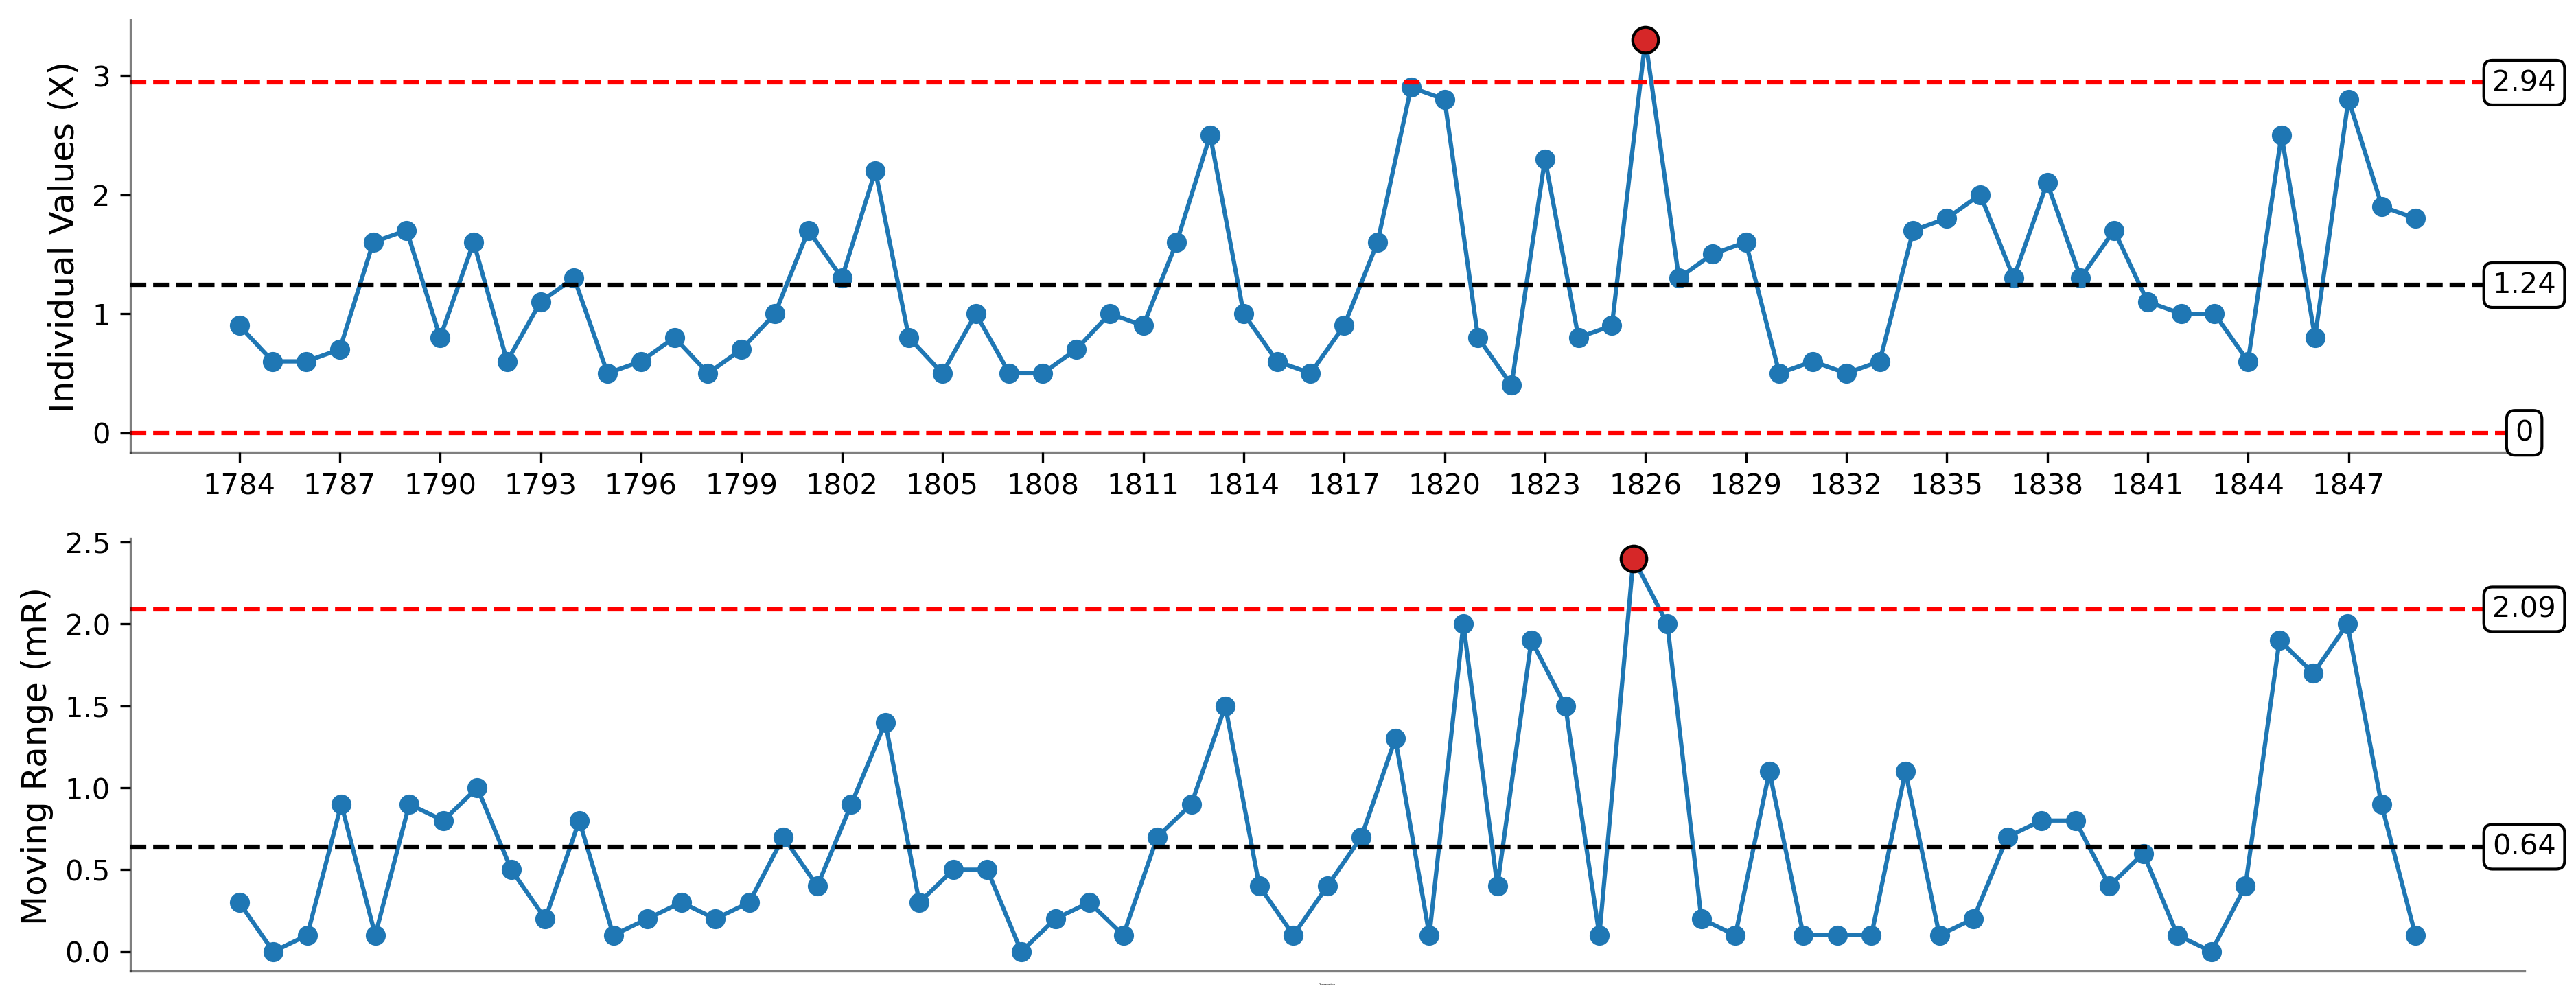

In [22]:
dublin_xmr_results = xmr.xmrchart(dublin, 
                                  'Death-to-Birth Ratio', 
                                  'Year', 
                                  tickinterval=3, 
                                  round_value=2)

## Fig 22.4: XmR Chart of inspection data

In [24]:
# Dataset URL
inspection_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/22-inner-diameter-inspection-data.csv'

# Get data
inspection_df = get_data(inspection_url)

# Specify 'Year' as dtype string
inspection_df['Sample'] = inspection_df['Sample'].astype('string')
inspection_df.dtypes

Sample             string
Inner diameter    float64
dtype: object

In [28]:
# Calculate moving ranges
inspection_df['Moving Ranges'] = abs(inspection_df['Inner diameter'].diff())
inspection_df

,Sample,Inner diameter,Moving Ranges
0,1,0.0554,NaN
1,2,0.0545,0.0009
2,3,0.0558,0.0013
3,4,0.0550,0.0008
4,5,0.0559,0.0009
5,6,0.0562,0.0003
6,7,0.0549,0.0013
7,8,0.0545,0.0004
8,9,0.0558,0.0013
9,10,0.0556,0.0002


**NOTE:** In generating the XmR Chart for the inspection values using the `process_improvement.py` Python package, the `round_value` argument was match the number of decimal points in the dataset. 

### XmR Chart using process_improvement 

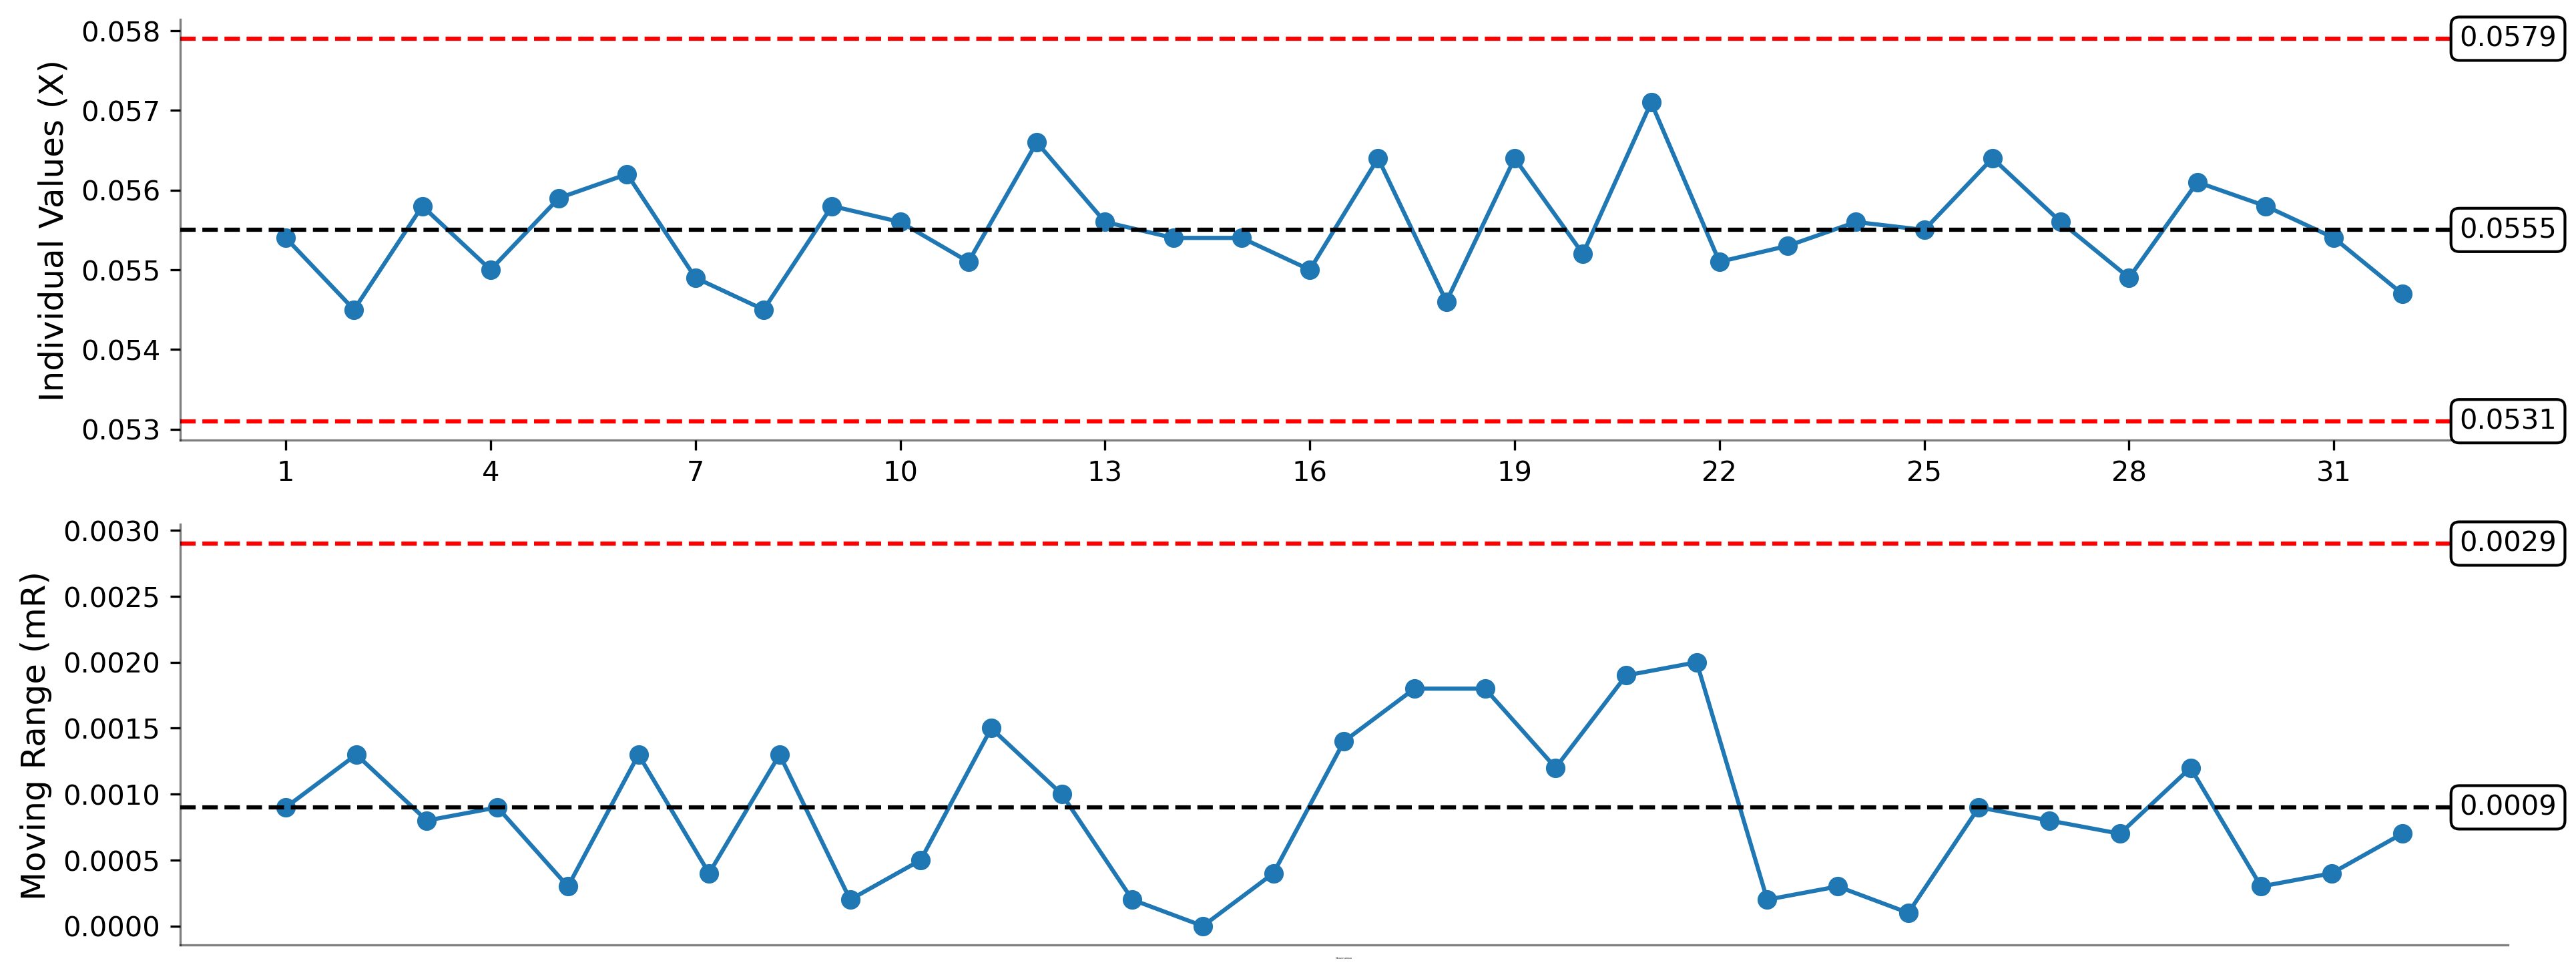

In [31]:
inspection_xmr_results = xmr.xmrchart(inspection_df, 
                                      'Inner diameter', 
                                      'Sample', 
                                      tickinterval=3, 
                                      round_value=4)

### XmR Chart from scratch

In [39]:
# Calculate the basic statistics
mean = inspection_df['Inner diameter'].mean()
average_mR = inspection_df['Moving Ranges'].mean()

# Set values for the numeric constants C1 and C2
C1 = 2.660
C2 = 3.268

# Calculate the Upper Range Limit
UPL = mean + (C1*average_mR)
# Calculate the Lower Process Limit
LPL = max(0, mean - (C1*average_mR)) # Note the max condition 
# Calculate the Upper Range Limit
URL = C2*average_mR

# Show the results 
print('UPL:',UPL, 'LPL:',LPL,'URL:',URL)

UPL: 0.05781603225806451 LPL: 0.053233967741935485 URL: 0.0028146967741935446


In [40]:
# Round setting
round_value = 4

# Extract Data
data = inspection_df['Inner diameter']
labels = inspection_df['Sample']
moving_ranges = inspection_df['Moving Ranges']

# Define Process Limits
xchart_lines = [(mean, 'black'), (UPL, 'red'), (LPL, 'red')]
mrchart_lines = [(average_mR, 'black'), (URL, 'red')]

# Mask values outside limits
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)

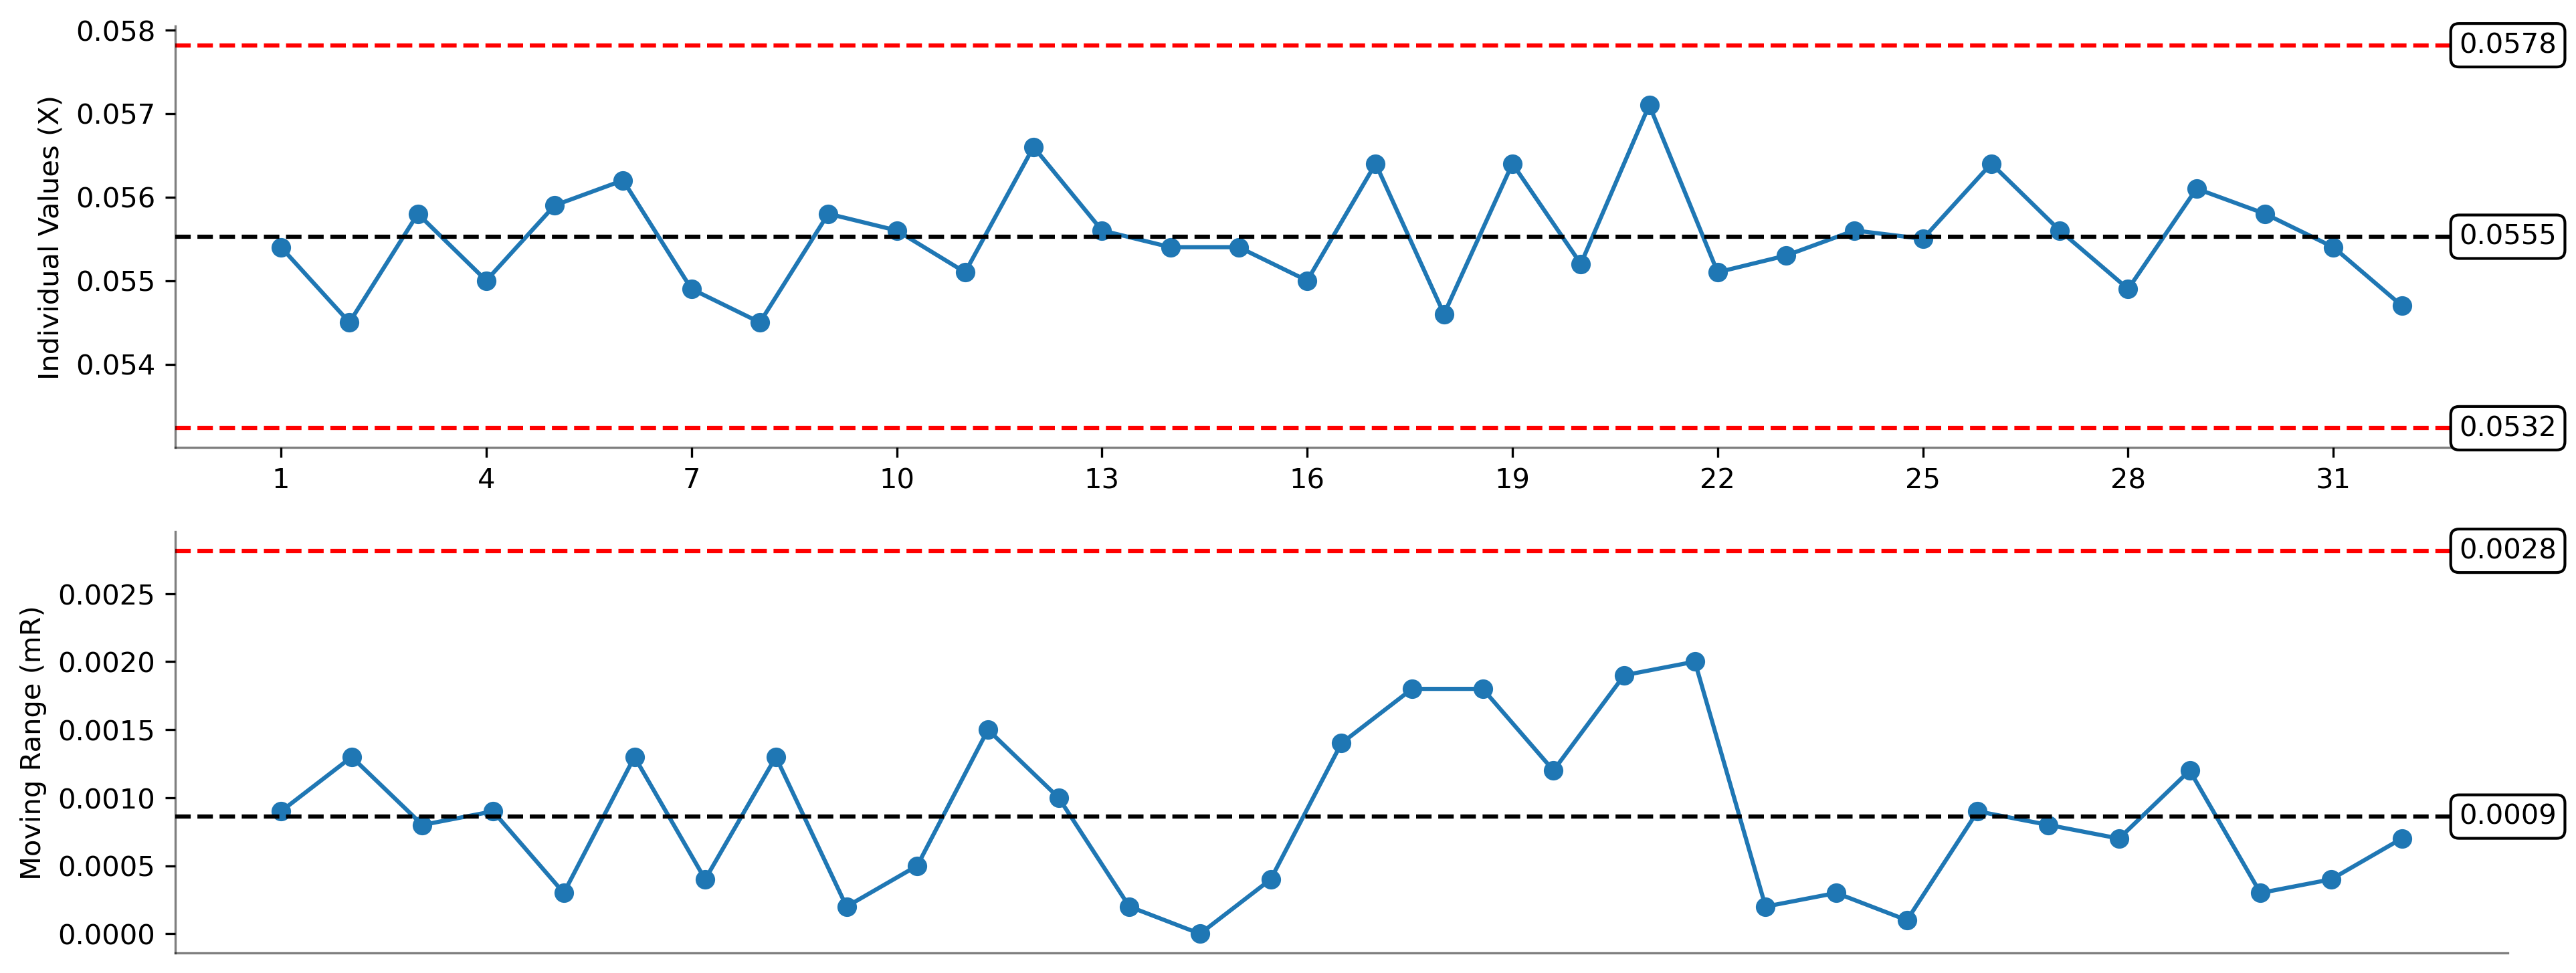

In [46]:
# Create figure and axs
fig, axs = plt.subplots(figsize=(15, 6), nrows=2, ncols=1, dpi=300)

# X Chart (Individuals Chart)
axs[0].plot(labels, data, marker='o', label="Data")
# Masking parametesr for X Chart
axs[0].plot(labels, lower_lim, marker='o', ls='none', 
            color='tab:red', markeredgecolor='black', markersize=9)
axs[0].plot(labels, upper_lim, marker='o', ls='none', 
            color='tab:red', markeredgecolor='black', markersize=9)

# Add Process Limits
for value, color in xchart_lines:
    axs[0].axhline(value, ls='--', c=color)

# Add Labels for Process Limits
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
for value, label in [(UPL, UPL), (LPL, LPL), (mean, mean)]:
    axs[0].text(axs[0].get_xlim()[1] * 1.0, value, round(value, round_value),
                color='black', ha='center', va='center', bbox=bbox_props)

# X axis formatting
tick_interval = 3
tick_positions = np.arange(0, len(labels), tick_interval)
axs[0].set_xticks(tick_positions)
axs[0].set_xticklabels(labels.iloc[tick_positions], ha='center')

# Moving Range Chart (mR Chart)
axs[1].plot(labels, moving_ranges, marker='o', label="Moving Range")
# Masking parameters for mR Chart
axs[1].plot(labels, url_greater, marker='o', ls='none', 
            color='tab:red', markeredgecolor='black', markersize=9)

# Add Process Limits
for value, color in mrchart_lines:
    axs[1].axhline(value, ls='--', c=color)

# Add Labels for Process Limits
for value, label in [(URL, URL), (average_mR, average_mR)]:
    axs[1].text(axs[1].get_xlim()[1], value, round(value, round_value),
                color='black', ha='center', va='center', bbox=bbox_props)

# Titles and Labels
axs[0].set_ylabel("Individual Values (X)")
axs[0].set_xlabel("")
axs[0].set_title("")

# Remove xticks on moving range chart
axs[1].set_xticks([])
axs[1].set_ylabel("Moving Range (mR)")

# Remove spines
sns.despine()
# Set alpha values
for ax in axs:
    ax.spines[['left','bottom']].set_alpha(0.5)

# Show Plot
plt.show()